<a href="https://colab.research.google.com/github/cetinus-gulin/ie423/blob/main/task5-6-7/task5-gulin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

#dfFashion = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank.csv')
dfFashion = pd.read_csv('mnist_fashion_test.csv')
dfFashion.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,164,58,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6,0,0,0,2,0,1,1,0,0,...,71,12,0,0,0,0,0,0,0,0


In [3]:
dfFashion.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.500000,0.00060,0.01020,0.060900,0.069400,0.236800,0.37270,0.690300,2.082300,5.252300,...,34.690000,23.768700,16.823700,17.771800,22.702800,18.275500,8.754000,3.021800,0.941700,0.085100
std,2.872425,0.04472,0.49368,2.560634,2.111973,4.843271,5.93103,7.401964,13.598537,22.856331,...,57.748118,49.256931,42.260436,43.845574,51.401812,45.578922,29.999685,18.128144,9.976385,2.429413
min,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,58.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,4.00000,45.00000,218.000000,185.000000,227.000000,226.00000,224.000000,225.000000,237.000000,...,255.000000,255.000000,255.000000,254.000000,255.000000,249.000000,239.000000,255.000000,255.000000,142.000000


In [4]:
# Define target and features

y = dfFashion['label']
X = scale(dfFashion.drop(['label'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

# Analyze data

Clothing 				 Label
AxesImage(shape=(28, 28)) 		 9


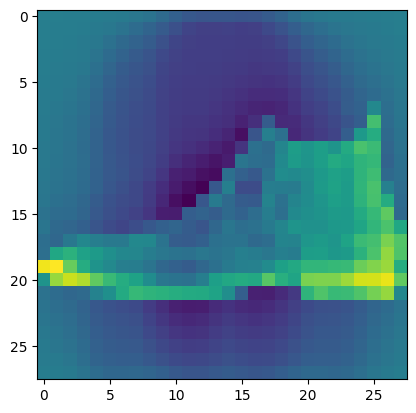

In [5]:
# Display first image
print('Clothing', '\t\t\t\t', 'Label')
print(plt.imshow(X[0].reshape((28,28))), '\t\t', y[0])

<Axes: ylabel='count'>

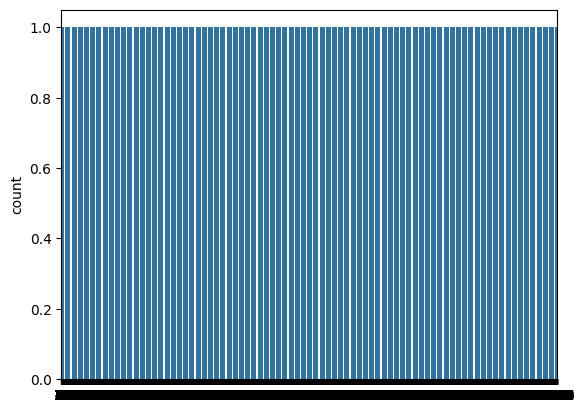

In [6]:
# Plot count of clothing types
sns.countplot(y)

# Predict clothing from picture

Suppor Vector Machine

In [7]:
%%time

# Build Support Vector Machines - Classifier model
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_test_pred = model_svm.predict(X_test)

print ('Classification Report (Support Vector Classifier):')
print (classification_report(y_test, y_test_pred))

Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       207
           1       0.99      0.95      0.97       196
           2       0.70      0.73      0.72       182
           3       0.80      0.89      0.84       198
           4       0.73      0.71      0.72       211
           5       0.91      0.90      0.91       206
           6       0.61      0.52      0.57       202
           7       0.88      0.91      0.89       204
           8       0.90      0.96      0.93       190
           9       0.93      0.91      0.92       204

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

CPU times: user 4.96 s, sys: 20.9 ms, total: 4.98 s
Wall time: 5.03 s


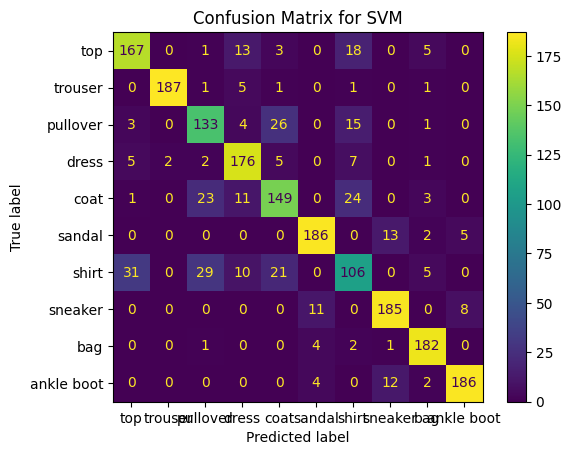

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for SVM
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"])
disp.plot()
plt.title("Confusion Matrix for SVM")
plt.show()

Neural Networks

In [9]:
%%time

# Build Neural Network - Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier()
model_nn.fit(X_train, y_train)
y_test_pred = model_nn.predict(X_test)

print ('Classification Report (Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       207
           1       0.97      0.96      0.96       196
           2       0.69      0.75      0.72       182
           3       0.84      0.86      0.85       198
           4       0.73      0.73      0.73       211
           5       0.92      0.92      0.92       206
           6       0.56      0.53      0.55       202
           7       0.90      0.91      0.91       204
           8       0.94      0.95      0.95       190
           9       0.95      0.94      0.95       204

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

CPU times: user 1min 12s, sys: 1.86 s, total: 1min 14s
Wall time: 10.1 s


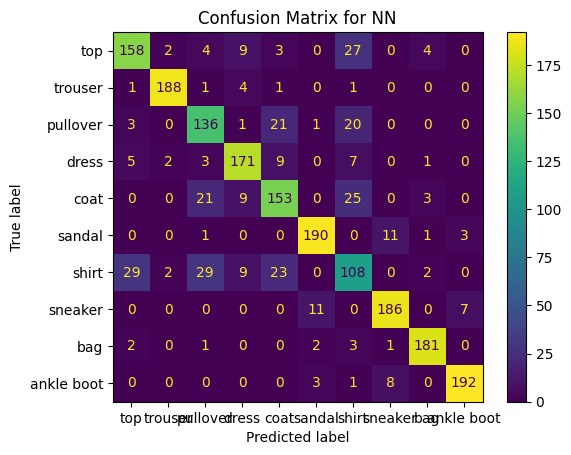

In [10]:
# Confusion matrix for NN
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"])
disp.plot()
plt.title("Confusion Matrix for NN")
plt.show()

Deep Neural Networks

In [11]:
%%time

# Build Deep Neural Network - Additional Hidden Layers
from sklearn.neural_network import MLPClassifier
model_dnn = MLPClassifier(hidden_layer_sizes=(100,100))
model_dnn.fit(X_train, y_train)
y_test_pred = model_dnn.predict(X_test)

print ('Classification Report (Deep Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Deep Neural Network):
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       207
           1       0.96      0.96      0.96       196
           2       0.67      0.71      0.69       182
           3       0.86      0.87      0.86       198
           4       0.72      0.70      0.71       211
           5       0.93      0.93      0.93       206
           6       0.60      0.58      0.59       202
           7       0.92      0.94      0.93       204
           8       0.94      0.95      0.95       190
           9       0.95      0.94      0.95       204

    accuracy                           0.84      2000
   macro avg       0.83      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

CPU times: user 1min 7s, sys: 1.86 s, total: 1min 9s
Wall time: 9.77 s


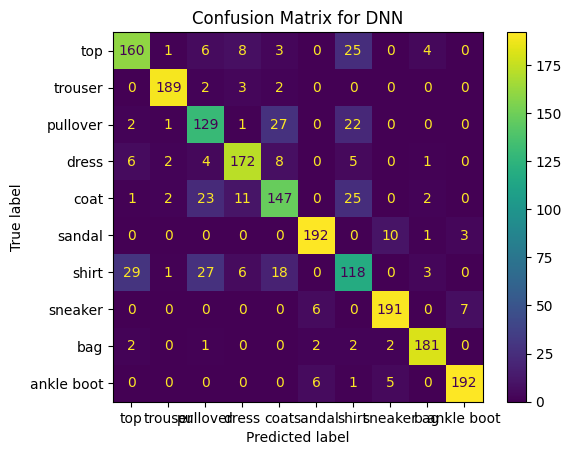

In [12]:
# Confusion matrix for DNN
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels= ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"])
disp.plot()
plt.title("Confusion Matrix for DNN")
plt.show()

# Cross Validation

In [13]:
# Cross-validate model across 7 different experiments
from sklearn.model_selection import cross_val_score
cross_val_score(model_dnn, X, y, cv=7, scoring='f1_macro')

array([0.85492595, 0.84739847, 0.83342327, 0.84467991, 0.83484052,
       0.86048239, 0.84658852])

# Takeways

- The dataset is quite balanced, as each category of clothing has close number of data points, around 100.
- Shirts, tops, coats and pullovers are the most wrongly predicted clothings.
- Cross validation function is changed to compare the F1 score for each different test/train pair. The reason to why I chose F1 score instead of the default accuracy is that as it uses both precision and recall to calculate the score. With F1 score, we can have a better insight on the performancei compared to accuracy where it only takes true prositives and true negatives into the consideration.
- SVM's worst F1 score is 0.7, best is 0.96 and average is 0.89.
- NN's worst F1 score is 0.71, best is 0.98 and average is 0.89.
- DNN's worst F1 score is  0.67, best is 0.98 and average is 0.87.

- I could not get the code to work on Google Colab as it said the dataset had NaN values. I tried dropping the NaN values but the problem persisted. Then I tried using imputers, but this hindered the dataset to have around 50 data points. I reverted back these changes and the run results are from my local runs. This may be caused by operating system difference, as I am running on MacOS and Google Colab runs on Linux.